In [ ]:
!pip install ipython-autotime
%load_ext autotime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.4 MB/s eta 0:00:00
time: 286 µs (started: 2023-08-11 11:53:28 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
time: 20.4 s (started: 2023-08-11 11:53:28 +00:00)


In [ ]:
# Refer https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
# https://www.ritchieng.com/machine-learning-cross-validation/
#https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
#from sklearn.cross_validation import cross_val_score

#from sklearn.model_selection import cross_val_predict

# define columns set
cols = ['Unnamed: 0', 'Source Port', 'Destination Port', 'Protocol', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',	 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Inbound', 'Label']
df = pd.read_csv('/content/drive/MyDrive/Merged_83_pilotstudy.csv', low_memory=False, names=cols, skiprows=1, index_col=None)
# low_memory=True in read_csv leads to non documented, silent errors

# set Features and Label
X = df.drop('Label', axis = 1)
y = df['Label']
print (X.shape, y.shape)
#X = df.iloc[:, 0:80] # read first 80 columns starting index 0
#y = df[['Label']] # read Label

# Normalize X, because of -ve values
scaler = preprocessing.MinMaxScaler()
normalized_X = scaler.fit_transform(X)

labelencoder = preprocessing.LabelEncoder()
y = labelencoder.fit_transform(y)
le_name_mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print(le_name_mapping)

# create an instance of RandomForest Classifier
#scoring1 = ['accuracy','precision_macro', 'recall_macro','f1_macro']
classifier = MLPClassifier(hidden_layer_sizes = (128),activation='relu', max_iter=1000, early_stopping=True, learning_rate_init=0.001)

#myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
scoring = {'acc': 'accuracy', 'ps': 'precision_macro', 'rs': 'recall_macro', 'fs': 'f1_macro'}
scores = cross_validate(classifier, normalized_X, y, scoring=scoring, cv=5, return_train_score=True)
#ROC_scores = cross_validate(classifier, normalized_X, y, scoring= myscore, cv=5)

print(scores.keys())
print('Accuracy Score: ', scores['test_acc'].mean())
print('Precision Score: ', scores['test_ps'].mean())
print('Recall Score: ', scores['test_rs'].mean())
print('F1 Score: ', scores['test_fs'].mean())
#print(crossval_scores.keys())
#print('ROC-AUC Score: ', ROC_scores['test_score'].mean())


(1309799, 82) (1309799,)
{'BENIGN': 0, 'DNS': 1, 'LDAP': 2, 'MSSQL': 3, 'NTP': 4, 'NetBIOS': 5, 'Portmap': 6, 'SNMP': 7, 'SSDP': 8, 'Syn': 9, 'TFTP': 10, 'UDP': 11, 'UDPLag': 12, 'WebDDoS': 13}
dict_keys(['fit_time', 'score_time', 'test_acc', 'train_acc', 'test_ps', 'train_ps', 'test_rs', 'train_rs', 'test_fs', 'train_fs'])
Accuracy Score:  0.7485240099055831
Precision Score:  0.7460655119639289
Recall Score:  0.74564663546667
F1 Score:  0.7276809656810425
time: 1h 1min 16s (started: 2023-08-11 11:53:48 +00:00)


In [ ]:
myscore = make_scorer(roc_auc_score, multi_class='ovr',needs_proba=True)
ROC_scores = cross_validate(classifier, normalized_X, y, scoring = myscore, cv=5)
print('ROC-AUC Score: ', ROC_scores['test_score'].mean())

ROC-AUC Score:  0.9811349387093241
time: 45min 27s (started: 2023-08-11 12:55:04 +00:00)


In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(classifier, normalized_X, y, cv=5)
conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)

[[109229     22      1      0     11      8     21      0      1      2
      62      0      3      0]
 [    15  63310  21000     53    740     32    559  14247      3      0
      20      0     12      9]
 [     7  35445  42529     37      4      0      1  21951      6      1
       7      1      7      4]
 [     2     43     72  97868      1      0      8    147    587      1
      41   1093    135      2]
 [    11    215      1      0  99475      4    109      2      1      3
      16      0     16    147]
 [     5     58      0    443     14  46536  52832      1      2      1
      11      4     90      3]
 [    13     97      3    177     30   2050  97386      3      4     94
      47      8     65     23]
 [     7   4904   3639     19      6   1126   3318  86856     24      0
      28      2     61     10]
 [     3     51     12   2574      3     19      8   1593  27013      1
       8  68690     15     10]
 [     4      0      1     11     13      3      9      1      6  78315
 

https://stackoverflow.com/questions/60829057/how-to-get-multi-class-roc-auc-in-cross-validate-in-sklearn

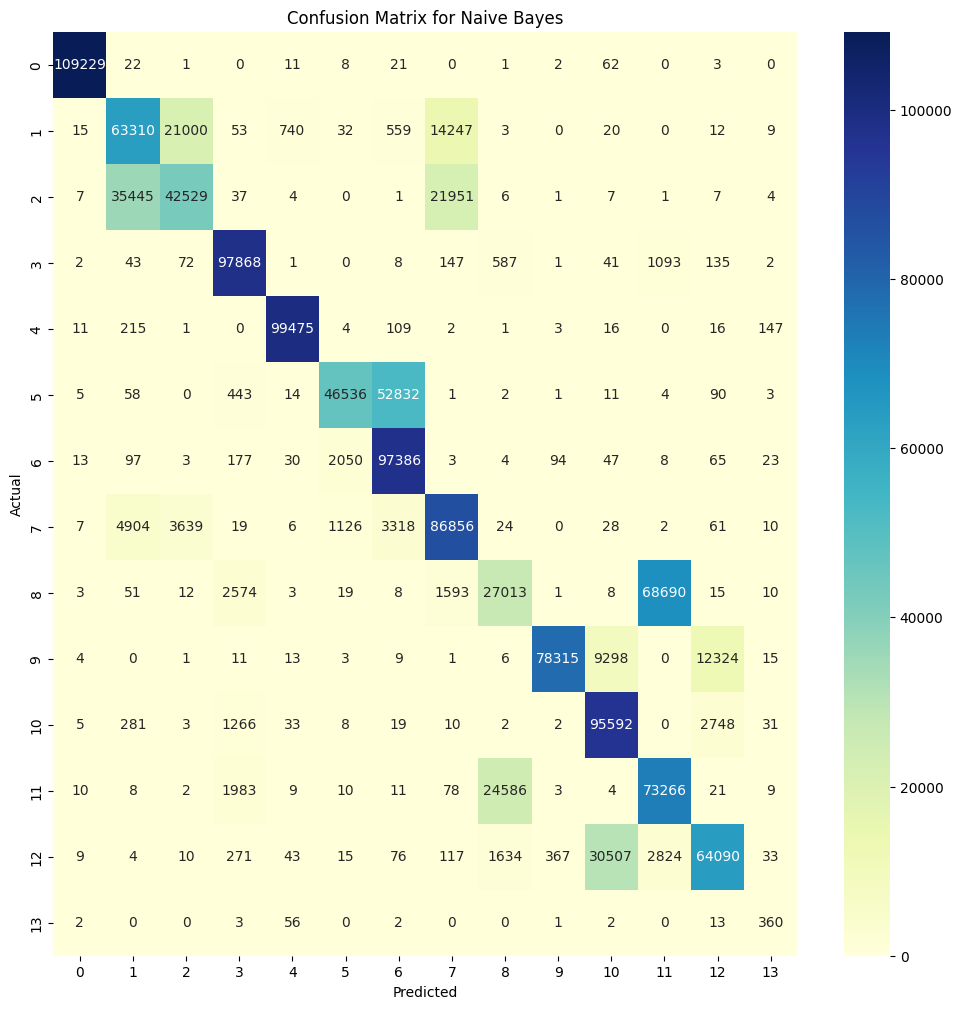

FPR: 
Predicted
0    -2.447368
1     9.267237
2    -0.756073
3     1.453135
4     2.198630
5    -0.065253
6     1.048088
7     1.525634
8    -0.582168
9    -0.022443
10    1.123671
11    1.582592
12   -0.760294
13    1.364055
dtype: float64
TPR: 
Actual
0     0.998802
1     0.633100
2     0.425290
3     0.978680
4     0.994750
5     0.465360
6     0.973860
7     0.868560
8     0.270130
9     0.783150
10    0.955920
11    0.732660
12    0.640900
13    0.820046
dtype: float64
time: 1.54 s (started: 2023-08-11 14:35:10 +00:00)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
y_classes = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(12,12)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args:
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y, y_pred, labels=labels)
    #cm_sum = np.sum(cm, axis=1, keepdims=True)
    #cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
          # p = cm_perc[i, j]
            #if i == j:
               # s = cm_sum[i]
               # annot[i, j] = '%d' % (c)
           # elif c == 0:
               # annot[i, j] = ''
            #else:
            annot[i, j] = '%d' % (c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title('Confusion Matrix for Naive Bayes')
    sns.heatmap(cm, annot=annot, cmap='YlGnBu', fmt='', ax=ax)
    filename = '/content/drive/MyDrive/CM83_MLP_0.001_EarlyStopping.png'
    plt.savefig(filename)
    plt.show()

    FP = cm.sum(axis=0) - np.diag(cm)
    FN = cm.sum(axis=1) - np.diag(cm)
    TP = np.diag(cm)
    TN = cm.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print('FPR: ')
    print(FPR)
    print('TPR: ')
    print(TPR)
    #print(classifier.classes_)
cm_analysis(y, y_pred, y_classes, ymap=None, figsize=(12,12))